In [1]:
import pandas as pd
import altair as alt

In [2]:
alt.themes.enable('opaque')
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [3]:
df = pd.read_csv("./input/war_daily_pitch.txt")

In [13]:
df.head()

,name_common,age,mlb_ID,player_ID,year_ID,team_ID,stint_ID,lg_ID,G,GS,...,pyth_exponent,waa_win_perc,WAA,WAA_adj,oppRpG_rep,pyth_exponent_rep,waa_win_perc_rep,WAR_rep,ERA_plus,ER_lg
0,David Aardsma,22.0,430911.0,aardsda01,2004,SFG,1,NL,11,0,...,1.902,0.4803,-0.2167,-0.0299,4.75633,1.895,0.4914,0.0942,66.675000,5.334
1,David Aardsma,24.0,430911.0,aardsda01,2006,CHC,1,NL,45,0,...,1.909,0.5061,0.2745,-0.1316,4.97303,1.919,0.4896,0.4682,114.295833,27.431
2,David Aardsma,25.0,430911.0,aardsda01,2007,CHW,1,AL,25,0,...,1.924,0.4782,-0.5450,-0.1995,5.00394,1.920,0.4859,0.3459,74.086956,17.040
3,David Aardsma,26.0,430911.0,aardsda01,2008,BOS,1,AL,47,0,...,1.904,0.4836,-0.7708,-0.0648,4.81624,1.901,0.4888,0.5205,83.796667,25.139
4,David Aardsma,27.0,430911.0,aardsda01,2009,SEA,1,AL,73,0,...,1.899,0.5105,0.7665,0.1574,4.90529,1.911,0.4894,0.7666,168.910000,33.782


### Lester vs. himself

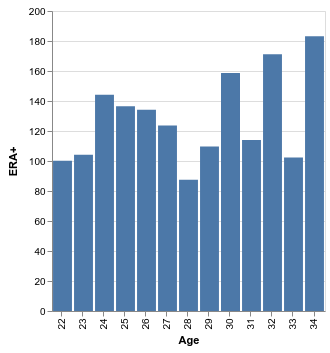

In [95]:
alt.Chart(df).mark_bar().encode(
    x=alt.X("age:O", axis=alt.Axis(title="Age")),
    y=alt.Y("ERA_plus:Q", axis=alt.Axis(title="ERA+")),
).transform_filter(alt.datum.name_common == 'Jon Lester')

### Lester vs. all starters ever

In [117]:
qualified_df = df[(df.age < 46) & (df.age > 17)]
qualified_df = qualified_df[~pd.isnull(qualified_df.age)]
qualified_df = qualified_df[(qualified_df.GS > 15) | (qualified_df.name_common == 'Jon Lester')]

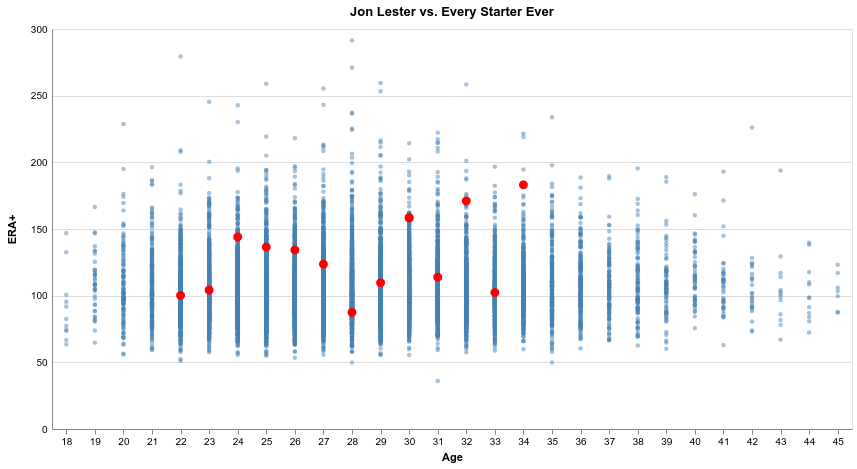

In [118]:
base = alt.Chart(qualified_df, title="Jon Lester vs. Every Starter Ever").properties(width=800, height=400).encode(
    x=alt.X("age:O", axis=alt.Axis(title="Age", labelAngle=0)),
    y=alt.Y("ERA_plus:Q", axis=alt.Axis(title="ERA+", tickCount=5, labelPadding=5, tickSize=0)),
    tooltip=["name_common", "year_ID", "ERA_plus"]
)

field = base.mark_circle(color="steelblue", size=20, opacity=0.5).transform_filter(alt.datum.name_common != 'Jon Lester')
lester = base.mark_circle(color="red", size=80, opacity=1).transform_filter(alt.datum.name_common == 'Jon Lester')

field + lester

### Top Age 34 seasons

In [22]:
qualified_df[qualified_df.age == 34].sort_values("ERA_plus", ascending=False)[[
    'name_common',
    'year_ID',
    'ERA_plus'
]].head(10).set_index("name_common")

,year_ID,ERA_plus
name_common,,
Roger Clemens,1997,221.573333
Cy Young,1901,218.980597
Nolan Ryan,1981,194.667857
Jon Lester,2018,183.123809
Chris Carpenter,2009,181.941667
Al Benton,1945,175.358139
Thornton Lee,1941,173.654430
Ray Kremer,1927,168.306452
Roy Halladay,2011,162.854098


### Top ERA+ this season

In [31]:
df[(df.year_ID == 2018) & (df.GS > 10)].sort_values("ERA_plus", ascending=False)[[
    'name_common',
    'age',
    'year_ID',
    'ERA_plus'
]].head(10).set_index("name_common")

,age,GS,year_ID,ERA_plus
name_common,,,,
Jacob deGrom,30.0,15,2018,252.118750
Justin Verlander,35.0,16,2018,233.831579
Luis Severino,24.0,15,2018,202.517391
Max Scherzer,33.0,15,2018,196.804348
Corey Kluber,32.0,15,2018,196.769231
Jon Lester,34.0,14,2018,183.123809
Mike Foltynewicz,26.0,14,2018,179.778947
Trevor Bauer,27.0,15,2018,175.753571
Chris Sale,29.0,16,2018,159.329032


### Top Age 35 seasons

Verlander has me thinking.

In [34]:
qualified_df[qualified_df.age == 35].sort_values("ERA_plus", ascending=False)[[
    'name_common',
    'year_ID',
    'ERA_plus'
]].head(10).set_index("name_common")

,year_ID,ERA_plus
name_common,,
Justin Verlander,2018,233.831579
Spud Chandler,1943,197.734783
Randy Johnson,1999,184.025333
Ryan Dempster,2012,181.523077
Eddie Cicotte,1919,175.579032
Lefty Grove,1935,174.896341
Roger Clemens,1998,174.407246
Bret Saberhagen,1999,170.564102
Whitey Ford,1964,170.212069
